Ripple Carry Adder

In [1]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [3]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.ccx(0,1,3)
circuit.cx(0,1)
circuit.ccx(1,2,3)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.measure(q,c)

In [4]:
circuit.draw()

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 11, 9, 21, 40, 48, 248851), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='b3fc3147-4250-44a8-8d85-6ead8c2c1b30', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0148491}, qobj_id='dcbbf8d4-8805-4e6a-95df-fa9ffdbc9cb5', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0xb=1), statevector=[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j]), header=Obj(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3]], creg_sizes=[['c0', 4]], memory_slots=4, n_qubits=4, name='circuit0', qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=593041999, shots=1, status='DONE', success=True, time_taken=0.0122395)], status='COMPLETED', success=True, time_taken=0.0530624389

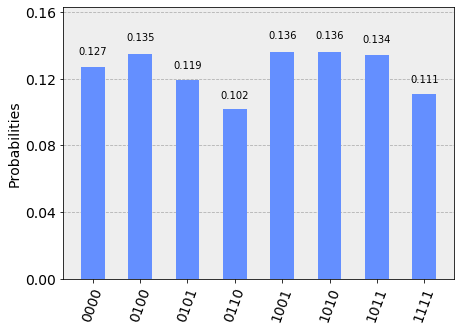

In [5]:
simulator = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator, shots=1000)
job1 = execute(circuit, backend, shots=1000)

result = job.result()
result1 = job1.result()

print(result1)
counts = result.get_counts(circuit)
print("\nTotal count are:",counts)
plot_histogram(counts)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


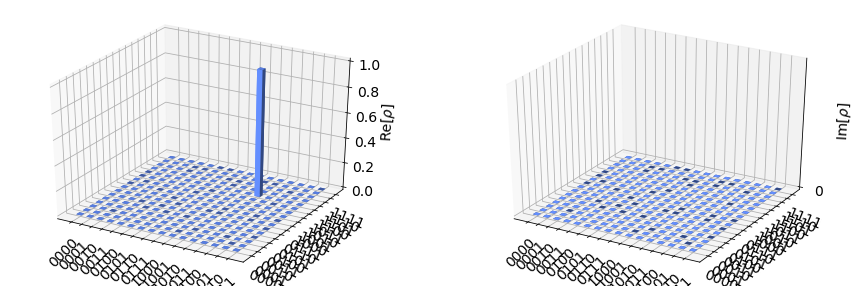

In [6]:
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)